In [1]:
import pandas as pd
import numpy as np
import os
from data_revised_prep import *

import sys
import cv2

import shutil
import pydicom

from icecream import ic

import pydicom
import matplotlib.pyplot as plt

# Steps to organize the ADNI dataset: 

1) Open a folder named "data-ADNI3-revised", 

2) inside "data-ADNI-revised" folder, add a subfolder named "raw" , also subfolder named "interim". 

3) As a subfolder of raw, create "ADNI3". As a subfolder of interim, create "ADNI3".

3) into the "raw" folder, add the unzipped data folders which are named as "3_ASMP_Sagittal_AD", "3_ASMP_Sagittal_CN","3_ASMP_Sagittal_MCI".

4) "# Run this cell to create Step 4" below creates 

        -- inside the interim folder, three folders AD, CN and MCI which contains several slices

5) ** Code doesn't work, check try_notebook for attempts ** "# Run this cell to create Step 5" below creates

        -- a folder named "resized", 

        -- inside the resized folder, three folders AD,CN and MCI which contains resized images from the corresponding folders.


In [2]:
df_AD = pd.read_csv("../revised_dataset/3_ASMP_Sagittal_AD_4_01_2024.csv")
new_df_AD = remove_duplicates(df_AD)

In [3]:
new_df_AD

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
6,I1005735,003_S_6264,AD,M,55,sc,MRI,Accelerated Sagittal MPRAGE,Original,2018-06-04,DCM,3/30/2024
65,I1254307,003_S_6833,AD,F,87,sc,MRI,Accelerated Sagittal MPRAGE,Original,2019-11-07,DCM,3/30/2024
13,I953859,007_S_4272,AD,M,77,init,MRI,Accelerated Sagittal MPRAGE,Original,2018-01-16,DCM,3/30/2024
15,I916119,007_S_4637,AD,F,76,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-10-10,DCM,3/30/2024
16,I898881,011_S_4827,AD,M,76,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-08-31,DCM,3/30/2024
10,I985197,011_S_6303,AD,M,70,sc,MRI,Accelerated Sagittal MPRAGE,Original,2018-04-12,DCM,3/30/2024
76,I1189178,013_S_6768,AD,F,78,sc,MRI,Accelerated Sagittal MPRAGE,Original,2019-07-19,DCM,3/30/2024
32,I1529331,013_S_6975,AD,M,80,sc,MRI,Accelerated Sagittal MPRAGE,Original,2021-12-21,DCM,3/30/2024
75,I1190066,016_S_5057,AD,M,82,init,MRI,Accelerated Sagittal MPRAGE,Original,2019-07-17,DCM,3/30/2024
86,I1151022,016_S_6708,AD,M,56,sc,MRI,Accelerated Sagittal MPRAGE,Original,2019-03-26,DCM,3/30/2024


In [4]:
df_AD = pd.read_csv("../revised_dataset/3_ASMP_Sagittal_AD_4_01_2024.csv")
new_df_AD= remove_duplicates(df_AD)

data_folder_AD = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI3-revised/raw/ADNI3/3_ASMP_Sagittal_AD"  
data_paths_AD = get_filtrated_data_paths(data_folder_AD, new_df_AD["Image Data ID"].tolist())

print('The number of AD subjects is '+str(len(new_df_AD)))
print('The number of total AD image paths is '+str(len(data_paths_AD)))

The number of AD subjects is 52
The number of total AD image paths is 10320


In [5]:
df_CN = pd.read_csv("../revised_dataset/3_ASMP_Sagittal_CN_4_01_2024.csv")
new_df_CN= remove_duplicates(df_CN)

data_folder_CN = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI3-revised/raw/ADNI3/3_ASMP_Sagittal_CN"  
data_paths_CN = get_filtrated_data_paths(data_folder_CN, new_df_CN["Image Data ID"].tolist())

print('The number of CN subjects is '+str(len(new_df_CN)))
print('The number of total image CN paths is '+str(len(data_paths_CN)))

The number of CN subjects is 381
The number of total image CN paths is 11363


In [6]:
new_df_CN

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
436,I863056,002_S_0413,CN,F,87,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-06-21,DCM,3/30/2024
460,I831065,002_S_1261,CN,F,81,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-03-15,DCM,3/30/2024
465,I829296,002_S_1280,CN,F,81,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-03-13,DCM,3/30/2024
391,I888008,002_S_4213,CN,F,84,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-08-14,DCM,3/30/2024
608,I1075136,002_S_4225,CN,M,77,init,MRI,Accelerated Sagittal MPRAGE,Original,2018-11-12,DCM,3/30/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
713,I1486321,941_S_6998,CN,M,57,sc,MRI,Accelerated Sagittal MPRAGE,Original,2021-08-30,DCM,3/22/2024
711,I1553931,941_S_7046,CN,F,71,sc,MRI,Accelerated Sagittal MPRAGE,Original,2022-03-08,DCM,3/22/2024
712,I1553005,941_S_7051,CN,M,64,sc,MRI,Accelerated Sagittal MPRAGE,Original,2022-03-07,DCM,3/22/2024
710,I1588331,941_S_7074,CN,M,71,sc,MRI,Accelerated Sagittal MPRAGE,Original,2022-05-03,DCM,3/22/2024


In [7]:
df_MCI = pd.read_csv("../revised_dataset/3_ASMP_Sagittal_MCI_4_01_2024.csv")
new_df_MCI= remove_duplicates(df_MCI)

data_folder_MCI = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI3-revised/raw/ADNI3/3_ASMP_Sagittal_MCI"  
data_paths_MCI = get_filtrated_data_paths(data_folder_MCI, new_df_MCI["Image Data ID"].tolist())

print('The number of MCI subjects is '+str(len(new_df_MCI)))
print('The number of total image MCI paths is '+str(len(data_paths_MCI)))

The number of MCI subjects is 184
The number of total image MCI paths is 36064


In [8]:
new_df_MCI

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
335,I843510,002_S_1155,MCI,M,68,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-04-24,DCM,3/30/2024
238,I1118713,002_S_6652,MCI,F,86,sc,MRI,Accelerated Sagittal MPRAGE,Original,2018-12-13,DCM,3/30/2024
164,I1270149,002_S_6695,MCI,M,66,sc,MRI,Accelerated Sagittal MPRAGE,Original,2019-03-14,DCM,3/30/2024
150,I1303613,002_S_6864,MCI,F,69,sc,MRI,Accelerated Sagittal MPRAGE,Original,2020-03-11,DCM,3/30/2024
310,I969412,003_S_0908,MCI,F,74,init,MRI,Accelerated Sagittal MPRAGE,Original,2017-10-20,DCM,3/30/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
294,I1005030,941_S_6392,MCI,M,89,sc,MRI,Accelerated Sagittal MPRAGE,Original,2018-05-30,DCM,3/30/2024
149,I1310783,941_S_6803,MCI,F,75,sc,MRI,Accelerated Sagittal MPRAGE,Original,2019-09-16,DCM,3/30/2024
45,I1544467,941_S_7041,MCI,F,73,sc,MRI,Accelerated Sagittal MPRAGE,Original,2022-02-14,DCM,3/30/2024
21,I1600180,941_S_7085,MCI,F,70,sc,MRI,Accelerated Sagittal MPRAGE,Original,2022-07-01,DCM,3/30/2024


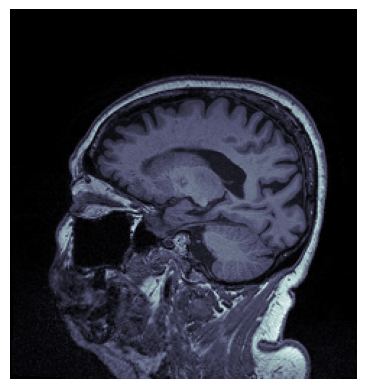

In [9]:
dicom_file_path = "../data-ADNI3-revised/raw/ADNI3/3_ASMP_Sagittal_AD/ADNI 2/003_S_6833/Accelerated_Sagittal_MPRAGE/2019-11-07_13_27_11.0/I1254307/ADNI_003_S_6833_MR_Accelerated_Sagittal_MPRAGE__br_raw_20191118170906436_90_S895543_I1254307.dcm"  # Replace with your DICOM file path
plot_dicom_image(dicom_file_path)

In [13]:
cropped_image = crop_black_frame(dicom_file_path)
output_file = "cropped_image.dcm"
# Save cropped image as a new DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape
dicom_data.save_as(output_file)

/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/.venv/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.02221695818604414499'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


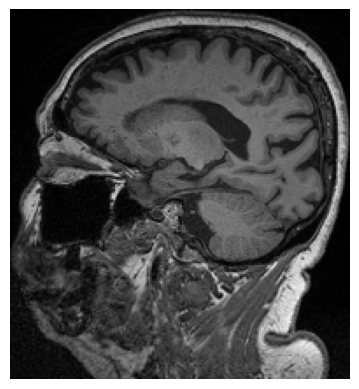

In [14]:
import pydicom

# Path to the DICOM file
dicom_file_path = "cropped_image.dcm"

# Read the DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract pixel data from the DICOM file
pixel_array = dicom_data.pixel_array

# Now you can work with the pixel array, for example, display it using matplotlib
import matplotlib.pyplot as plt

plt.imshow(pixel_array, cmap='gray')
plt.axis('off')
plt.show()